In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [2]:
car_data = pd.read_csv('C:\\Users\\91993\\Downloads/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking the destribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical data

In [10]:
# encoding the Fuel_Type Column
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace= True)

# encoding the Seller_Type Column
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace= True)

# encoding the Transmission Column
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace= True)


In [11]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data into training & Target

In [12]:
x = car_data.drop(['Car_Name','Selling_Price'], axis =1)
y = car_data['Selling_Price']

In [14]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

Model training

1.Linear Regression

In [16]:
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [18]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [19]:
# R Squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R square Error :", error_score)


R square Error : 0.8799451660493701


Visualize the actual prices and predicted prices 

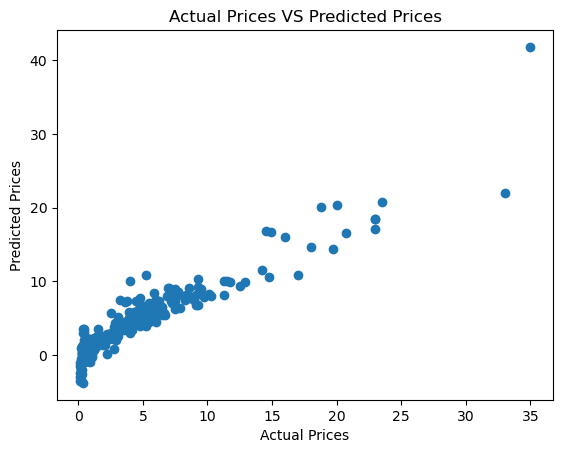

In [20]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [21]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [22]:
# R Squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square Error :", error_score)

R square Error : 0.836576671502687


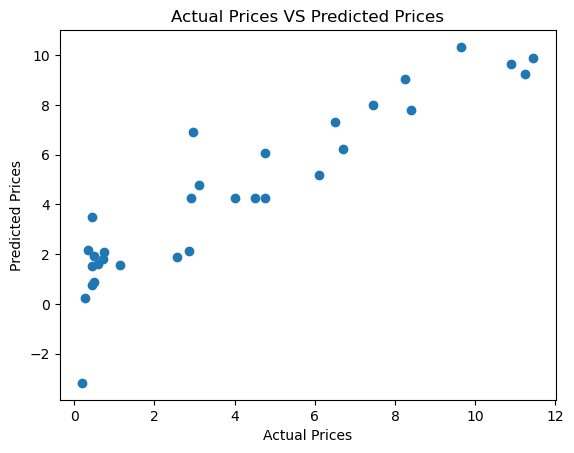

In [23]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

2.Lasso Regression

In [24]:
lass_reg_model = Lasso()

In [25]:
lass_reg_model.fit(x_train, y_train)

Lasso()

Model Evaluation

In [26]:
#Prediction on training data
training_data_prediction = lass_reg_model.predict(x_train)

In [30]:
 # R Squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R square Error :", error_score)

R square Error : 0.8427856123435794


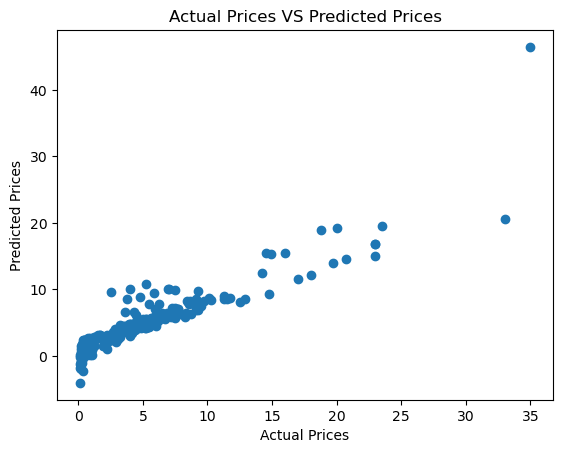

In [32]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [33]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(x_test)

In [34]:
# R Squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square Error :", error_score)

R square Error : 0.8709167941173195


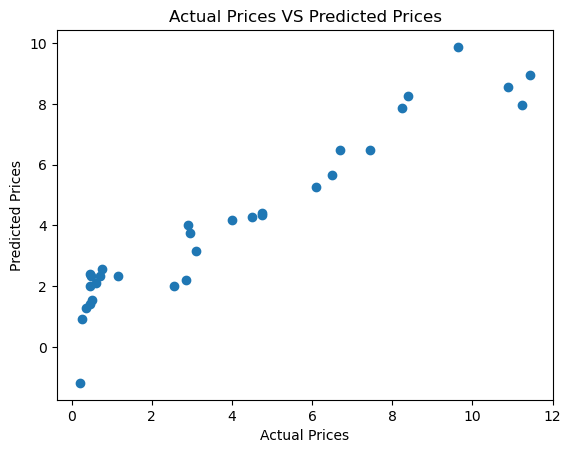

In [35]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices VS Predicted Prices")
plt.show()